Dataset preview:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Missing values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                     

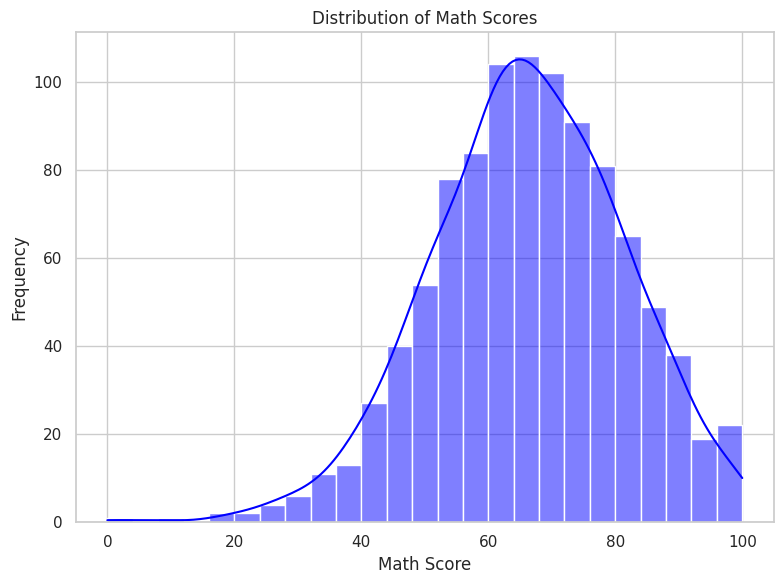

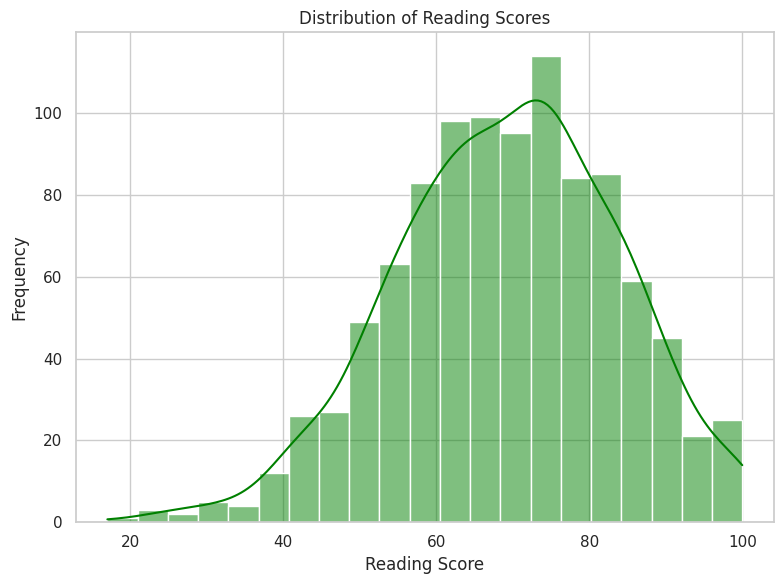

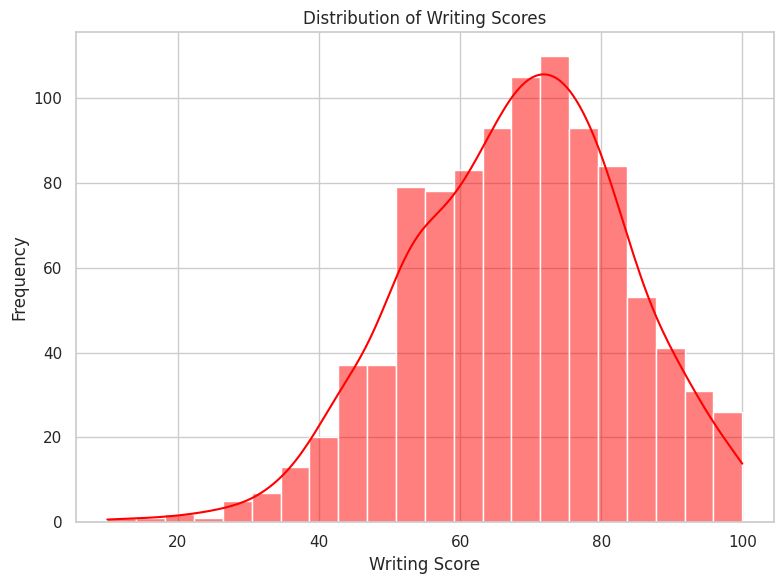

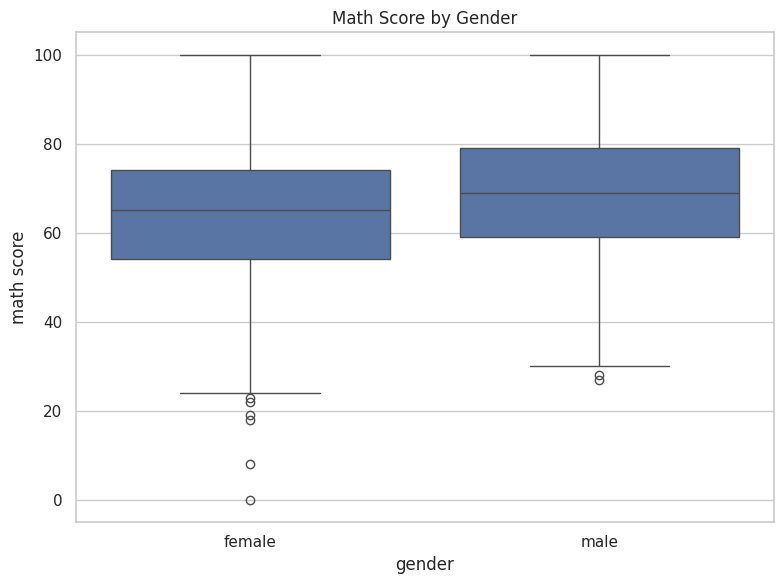

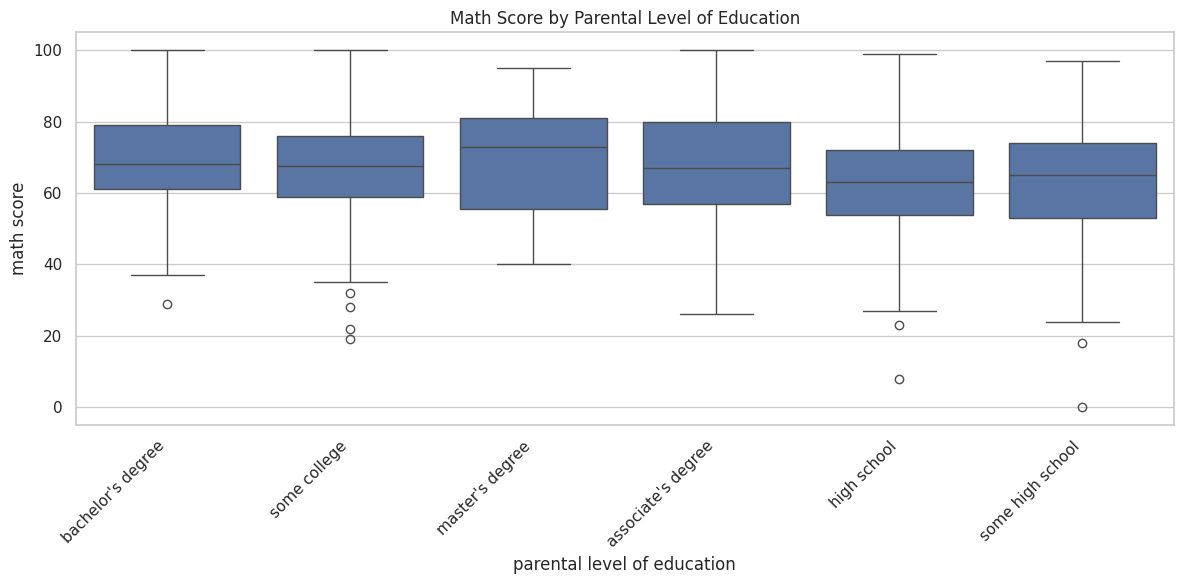

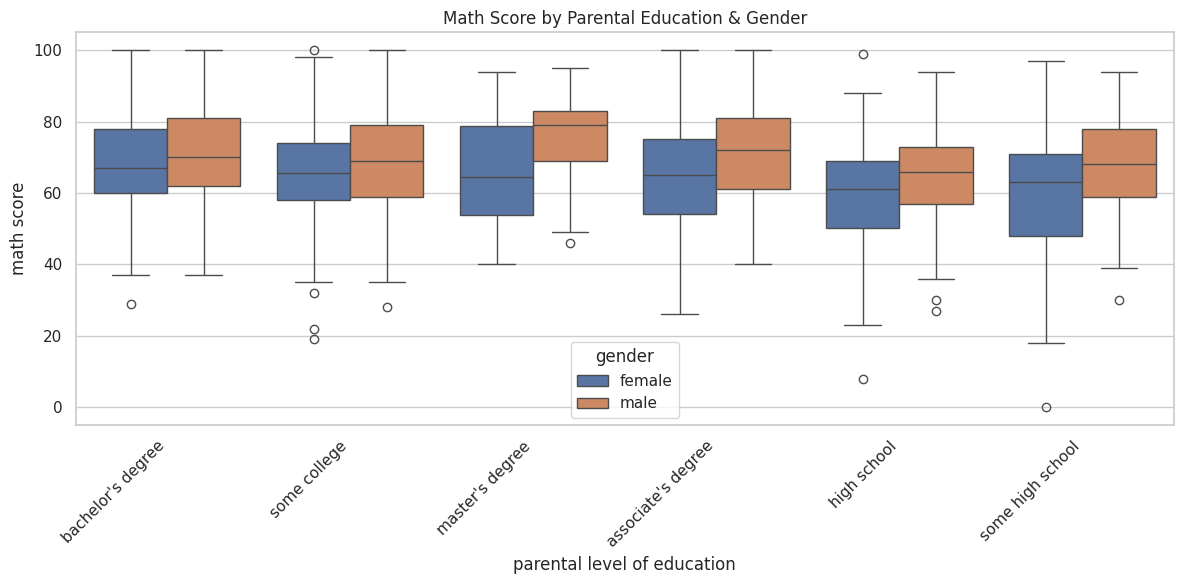

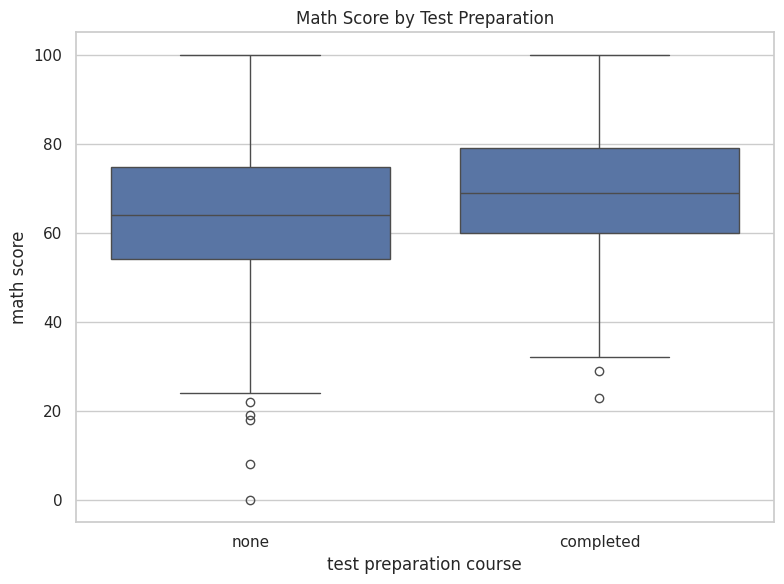

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Squared Error: 77.24
R² Score: 0.68


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All plots, predictions, and model saved and ready for download!


In [2]:
# ------------------------------
# STUDENT PERFORMANCE ANALYSIS
# ------------------------------

# Step 1: Install libraries (run only if needed in Colab)
!pip install pandas matplotlib seaborn scikit-learn joblib

# Step 2: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from google.colab import files  # For downloading files in Colab

# Improve plot aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# Step 3: Load the dataset
df = pd.read_csv('StudentsPerformance.csv')
print("Dataset preview:")
print(df.head())

# Step 4: Basic EDA
print("\nMissing values:")
print(df.isnull().sum())

print("\nDescriptive stats:")
print(df.describe())

# Step 5: Plot distributions
# 5.1 Math Score Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['math score'], kde=True, color='blue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("math_score_distribution.png")
plt.show()

# 5.2 Reading Score Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['reading score'], kde=True, color='green')
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("reading_score_distribution.png")
plt.show()

# 5.3 Writing Score Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['writing score'], kde=True, color='red')
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("writing_score_distribution.png")
plt.show()

# Step 6: Boxplots for categories
# 6.1 Math Score by Gender
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Math Score by Gender')
plt.tight_layout()
plt.savefig("math_score_by_gender.png")
plt.show()

# 6.2 Math Score by Parental Education
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.title('Math Score by Parental Level of Education')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("math_score_by_parental_education.png")
plt.show()

# 6.3 Math Score by Parental Education & Gender
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education', y='math score', hue='gender', data=df)
plt.title('Math Score by Parental Education & Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("math_score_by_parental_education_gender.png")
plt.show()

# 6.4 Test Preparation Impact
plt.figure(figsize=(8,6))
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Math Score by Test Preparation')
plt.tight_layout()
plt.savefig("math_score_by_test_preparation.png")
plt.show()

# Step 7: Download all saved plots
files.download("math_score_distribution.png")
files.download("reading_score_distribution.png")
files.download("writing_score_distribution.png")
files.download("math_score_by_gender.png")
files.download("math_score_by_parental_education.png")
files.download("math_score_by_parental_education_gender.png")
files.download("math_score_by_test_preparation.png")

# Step 8: Prepare Data for Linear Regression
# Use reading and writing scores to predict math score
X = df[['reading score','writing score']]
y = df['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 10: Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 11: Save predictions
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results.to_csv("predictions.csv", index=False)
files.download("predictions.csv")

# Step 12: Save trained model
joblib.dump(model, "linear_regression_model.pkl")
files.download("linear_regression_model.pkl")

print("All plots, predictions, and model saved and ready for download!")